# Libraries

In [32]:
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.datasets import make_classification

import pandas as pd
pd.__version__

'1.5.3'

# Dataset

In [33]:
df_train = pd.read_csv("boston_housing_train.csv")
df_test = pd.read_csv("boston_housing_test.csv")

print("df_train.shape:", df_train.shape)

df_train.shape: (404, 14)


In [34]:
y_train = np.array(df_train['label'])
x_train = df_train.drop('label', axis=1).to_numpy()

y_test = np.array(df_test['label'])
x_test = df_test.drop('label', axis=1).to_numpy()

print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

x_train.shape: (404, 13)
x_test.shape: (102, 13)


# ML model training

In [35]:
clf= LinearRegression()
clf.fit(x_train, y_train)

pred=clf.predict(x_test)
mae_val = sklearn.metrics.mean_absolute_error(pred, y_test)
print("mae_val: %.3f" %mae_val)

print("mean_ytest: %.3f, std_ytest: %.3f" %(np.mean(y_test),np.std(y_test)))
print("mean_pred_test: %.3f, std_pred_test: %.3f" %(np.mean(pred),np.std(pred)))

mae_val: 3.464
mean_ytest: 23.078, std_ytest: 9.124
mean_pred_test: 23.133, std_pred_test: 7.539


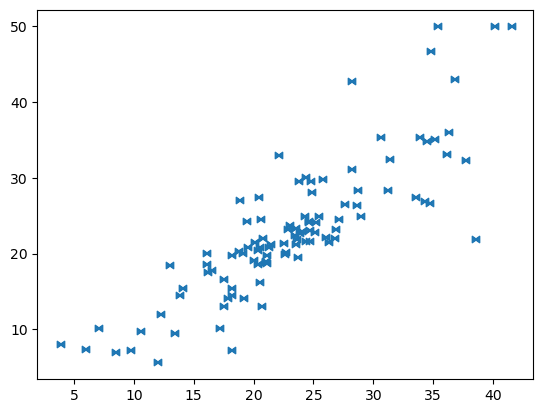

In [36]:
# a visualization of predictions vs ground truth values
plt.scatter(pred, y_test, marker=r'$\bowtie$', label="Pred")
plt.show()

In [37]:
print("x_train.shape[0]:", x_train.shape[0])

idx = np.random.randint(x_train.shape[0], size=7) # generate 7 random integers between 0 and x_train.shape[0]
print("\nidx:", idx)
print("\nx_train[idx,:5]\n", x_train[idx,:5])

x_train.shape[0]: 404

idx: [183 254  82 349  33 180  57]

x_train[idx,:5]
 [[6.91100e-02 4.50000e+01 3.44000e+00 0.00000e+00 4.37000e-01]
 [2.86558e+01 0.00000e+00 1.81000e+01 0.00000e+00 5.97000e-01]
 [8.02710e-01 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01]
 [1.50100e-02 9.00000e+01 1.21000e+00 1.00000e+00 4.01000e-01]
 [1.05393e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01]
 [5.66637e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.40000e-01]
 [7.36711e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.79000e-01]]


In [38]:
idx = np.random.randint(x_train.shape[0], size=x_train.shape[0]) # generate x_train.shape[0]=404 random integers between 0 and x_train.shape[0]
print("\nnum. unique rnd integers", len(list(set(idx))))
print("\nratio unique rnd integers: %.3f" %(len(list(set(idx)))/x_train.shape[0]))


num. unique rnd integers 253

ratio unique rnd integers: 0.626


In [39]:
# a boostrapped training set (i.e., some instances are repeated)
x_trainQ = x_train[idx,:]
y_trainQ = y_train[idx]

print("x_trainQ.shape:", x_trainQ.shape)

x_trainQ.shape: (404, 13)


In [40]:
# collecting the trained models
clf = LinearRegression()
clf.fit(x_trainQ, y_trainQ)

clfList=[]
clfList.append(clf)

# Task 1: Bagging

* Create 10 different classifier by sampling the X_TRAIN, BOSTON HOUSE PRICE
* Apply your ensembled learners to test data 

In [41]:
# TASK -1 code here
L = 10 # num classifiers
N = 404 # num training instances

clf = LinearRegression()
maeList = []

for l in range(L):
    
    idx = np.random.randint(x_train.shape[0], size=404)
    
    x_trainQ = x_train[idx, :]
    y_trainQ = y_train[idx]
    
    clf.fit(x_trainQ, y_trainQ)
    pred = clf.predict(x_test)
    
    MAE = sklearn.metrics.mean_absolute_error(pred, y_test)
    maeList.append(MAE)
    
print('Mean test data MAE: %.2f' % np.mean(maeList))
print('Stdev test data MAE: %.2f' % np.std(maeList))

Mean test data MAE: 3.50
Stdev test data MAE: 0.16


# Task 2: Adaboost

* N: the number of examples, 500
* F: number of feature: 15
* L: the number of learners, 10
* $p_{j}^{t}= $  denotes the probability that the instance $pair (x_{t} , r_{t})$ is drawn to train the j-th base-learner.
* Initial condition $p_{1}^{t}=$  1/N

## creating the dataset

In [42]:
# create a dataset
N = 500 # num training instances
F = 15 # num features

X, y = make_classification(N,  n_features=F, flip_y=0.50)

# num pos , num neg instances
print("num_pos: %d, num_neg: %d" %(sum(y==1),sum(y==0)))

num_pos: 261, num_neg: 239


In [43]:
# initial prob values for each instance
prob = np.repeat(1/N,N)
print("prob[:5]", prob[:5])

prob[:5] [0.002 0.002 0.002 0.002 0.002]


In [44]:
# bootstrap sample (with repetition) based on selection probabilities
idx = np.random.choice(N, N, p=prob)
print("len(idx):", len(idx))
print("unique-len(set(idx)):", len(set(idx)))

len(idx): 500
unique-len(set(idx)): 321


## ML model training

In [45]:
clf = LogisticRegression(solver = 'lbfgs')
clf.fit(X,y)

# training error
print("correct clf: %d, total: %d" %(sum(clf.predict(X) == y),len(y)))
print("accuracy: %.3f" %(sum(clf.predict(X) == y)/len(y)))

correct clf: 358, total: 500
accuracy: 0.716


In [46]:
# Succesfully classified instances
suc = (clf.predict(X) == y)
print("\nsuc[:10]\n", suc[:10])

print("\n selection probs:\n", list(zip(prob[:10], suc[:10])))


suc[:10]
 [ True  True  True False  True  True  True  True  True  True]

 selection probs:
 [(0.002, True), (0.002, True), (0.002, True), (0.002, False), (0.002, True), (0.002, True), (0.002, True), (0.002, True), (0.002, True), (0.002, True)]


## Adaboost Implementation

In [47]:
# Adaboost
prob=np.repeat(1/N,N)
B = []
clfList = []

for j in range(L):

    idx = np.random.choice(N, N, p=prob)
    Xj = X[idx]
    yj = y[idx]

    clf = LogisticRegression(solver='lbfgs')
    clf.fit(Xj, yj)

    preds = clf.predict(X)
    E = sum(prob * (preds != y))
    if E > 0.5:
        break
    
    # update prediction probs
    Bj = E / (1-E)
    B.append(Bj)
    prob[np.where(preds == y)] *= Bj
    prob /= sum(prob)

    clfList.append(clf)

### testing
* predictions are calculated as follows:
$y_i = \sum_{j=1}^L (\log \frac{1}{B_j}) d_{ji}(x)$

In [48]:
# Testing
def make_prediction(x):

    predictions = []
    for clf in clfList:
        predictions.append(clf.predict_proba(x.reshape(1, -1)).flatten())
    
    # Multiply the predictions by their corresponding weights and sum them up across all classifiers.
    # This results in a weighted vote for each class.
    weighted_sum = np.sum(np.array(predictions) * np.log(1/np.array(B)).reshape(-1,1), axis=0)
    
    # Return the class label with the highest weighted sum, which is the final ensemble prediction
    return np.argmax(weighted_sum)

In [49]:
preds = [make_prediction(x) for x in X]

print("adaboost - acc: %.3f" %(sum(preds == y)/500))

adaboost - acc: 0.702
